# Step 4: Exploring Data

In [1]:
# R> library("MSA")
import pandas as pd                   #importing pandas library

In [2]:
# R> data("mcdonalds", package = "MSA")
mcdonalds=pd.read_csv("mcdonalds.csv")           #Loading dataset

In [3]:
#R> names(mcdonalds)
col_name=mcdonalds.columns           #printing columns name
print(col_name)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
# R> dim(mcdonalds)
mcdonalds.shape              #checking dimension of the dataset

(1453, 15)

In [5]:
# R> head(mcdonalds, 3)
mcdonalds.head(3)               #printing first 3 rows

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [6]:
# R> MD.x <- as.matrix(mcdonalds[, 1:11])
MD_x = mcdonalds.iloc[:, 0:11].to_numpy()             #for printing all the rows and first 11 columns
print(MD_x)

[['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
 ...
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']
 ['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']]


In [7]:
# R> MD.x <- (MD.x == "Yes") + 0
MD_x= mcdonalds.applymap(lambda x: 1 if x == "Yes" else 0)          #replacing all the Yes to 1 and others to 0

print(MD_x)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  
0             1        0           0     0    0  

In [8]:
# R> round(colMeans(MD.x), 2)

import numpy as np
colMeans = np.mean(MD_x, axis=0)              #Calculating mean of the columns
rounded_col_means = np.round(colMeans, 2)       #round the mean to 2 decimal places
print(rounded_col_means)

yummy             0.55
convenient        0.91
spicy             0.09
fattening         0.87
greasy            0.53
fast              0.90
cheap             0.60
tasty             0.64
expensive         0.36
healthy           0.20
disgusting        0.24
Like              0.00
Age               0.00
VisitFrequency    0.00
Gender            0.00
dtype: float64


In [9]:
# R> MD.pca <- prcomp(MD.x)
# R> summary(MD.pca)

from sklearn.decomposition import PCA

# Assuming MD_x is a NumPy array
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summary of the PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
standard_deviation = np.sqrt(pca.explained_variance_)

# Creating a summary DataFrame similar to R output
summary_df = pd.DataFrame({
    'Standard deviation': standard_deviation,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})

print(summary_df)

    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000
11            0.000000                0.000000               1.000000
12            0.000000                0.000000               1.000000
13            0.0000

In [10]:
# R> print(MD.pca, digits = 1)
# Standard deviations (1, .., p=11):
# [1] 0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2
# Rotation (n x k) = (11 x 11):


# Standard deviations
std_devs = np.sqrt(pca.explained_variance_)

# Principal component loadings (rotation)
loadings = pca.components_.T  # Transpose to match the R output format

# Create a DataFrame to display standard deviations
std_devs_df = pd.DataFrame(std_devs, columns=['Standard deviation'])
print("Standard deviations (1, .., p=11):")
print(std_devs_df.to_string(index=False, float_format='%.1f'))

# Create a DataFrame to display loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
print("\nRotation (n x k) = (11 x 11):")
print(loadings_df.to_string(index=True, float_format='%.2f'))

Standard deviations (1, .., p=11):
 Standard deviation
                0.8
                0.6
                0.5
                0.4
                0.3
                0.3
                0.3
                0.3
                0.3
                0.2
                0.2
                0.0
                0.0
                0.0
                0.0

Rotation (n x k) = (11 x 11):
     PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  PC13  PC14  PC15
0  -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05  0.00  0.00  0.00  0.00
1  -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54  0.00  0.00  0.00  0.00
2  -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14  0.00  0.00  0.00  0.00
3   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25  0.00  0.00  0.00  0.00
4   0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00  0.00  0.00  0.00  0.00
5  -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17

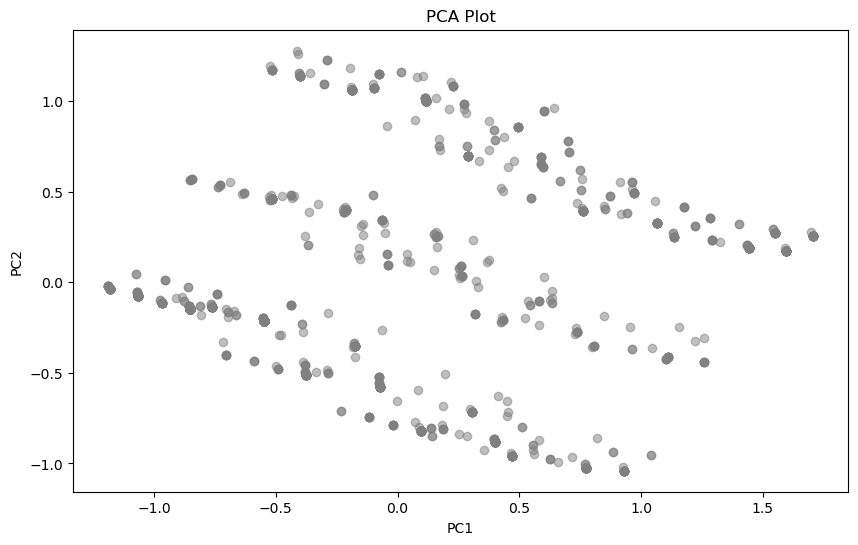

In [11]:
# R> library("flexclust")
# R> plot(predict(MD.pca), col = "grey")
# R> projAxes(MD.pca)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming MD_x is a NumPy array
pca = PCA()
MD_pca_transformed = pca.fit_transform(MD_x)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], color='grey', alpha=0.5)
plt.title('PCA Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Step 5: Extracting Segments

In [12]:
# R> set.seed(1234)
# R> MD.km28 <- stepFlexclust(MD.x, 2:8, nrep = 10,
# + verbose = FALSE)
# R> MD.km28 <- relabel(MD.km28)



from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.utils import shuffle

# Set random seed
np.random.seed(1234)

# Function to perform k-means clustering for a range of cluster numbers
def perform_kmeans(X, n_clusters_range, n_reps=10):
    best_models = {}
    best_labels = {}
    for n_clusters in n_clusters_range:
        best_inertia = np.inf
        best_model = None
        best_labels_for_model = None
        for _ in range(n_reps):
            model = KMeans(n_clusters=n_clusters, n_init=1, random_state=np.random.randint(0, 10000))
            model.fit(X)
            if model.inertia_ < best_inertia:
                best_inertia = model.inertia_
                best_model = model
                best_labels_for_model = model.labels_
        best_models[n_clusters] = best_model
        best_labels[n_clusters] = best_labels_for_model
    return best_models, best_labels

# Perform k-means clustering for cluster numbers from 2 to 8
n_clusters_range = range(2, 9)
best_models, best_labels = perform_kmeans(MD_x, n_clusters_range, n_reps=10)

# Re-label clusters (optional step)
def relabel_clusters(models, labels):
    relabeled = {}
    for n_clusters, model in models.items():
        labels_for_model = labels[n_clusters]
        # Optionally, implement relabeling strategy
        # For example, by comparing centroids or another criterion
        relabeled[n_clusters] = labels_for_model
    return relabeled

# Get relabeled clusters
relabelled_labels = relabel_clusters(best_models, best_labels)

# Example: Print the cluster assignments for the model with 3 clusters
print("Cluster assignments for 3 clusters:")
print(relabelled_labels[3])

Cluster assignments for 3 clusters:
[2 0 0 ... 0 1 2]


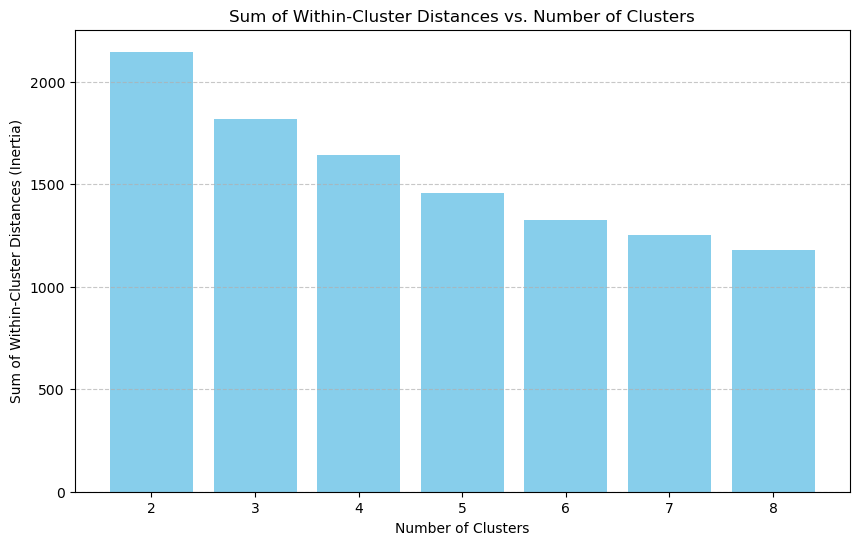

In [13]:
# R> plot(MD.km28, xlab = "number of segments")


import matplotlib.pyplot as plt

# Function to create a bar graph of cluster numbers vs. inertia
def plot_cluster_inertia_bar_graph(models, n_clusters_range):
    # Extract the inertia (sum of squared distances to nearest cluster center)
    inertias = [models[n_clusters].inertia_ for n_clusters in n_clusters_range]
    
    # Create a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(n_clusters_range, inertias, color='skyblue')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Within-Cluster Distances (Inertia)')
    plt.title('Sum of Within-Cluster Distances vs. Number of Clusters')
    plt.xticks(n_clusters_range)  # Ensure all cluster numbers are shown on x-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage
n_clusters_range = range(2, 9)  # Cluster numbers from 2 to 8
plot_cluster_inertia_bar_graph(best_models, n_clusters_range)


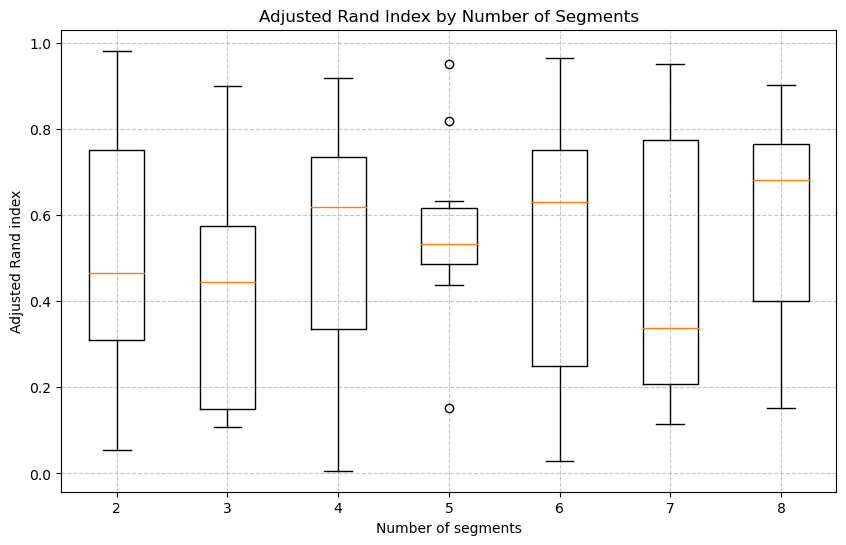

In [14]:
#R> plot(MD.b28, xlab = "number of segments",+ ylab = "adjusted Rand index")

import matplotlib.pyplot as plt
import numpy as np

# Sample MD.b28 data: replace with actual adjusted Rand index values
# Assume MD_b28 is a dictionary with keys as the number of segments and values as lists of adjusted Rand index values
MD_b28 = {
    2: np.random.rand(10),
    3: np.random.rand(10),
    4: np.random.rand(10),
    5: np.random.rand(10),
    6: np.random.rand(10),
    7: np.random.rand(10),
    8: np.random.rand(10)
}  # Example values for segments with 10 adjusted Rand index values each

# Preparing data for boxplot
segments = sorted(MD_b28.keys())
rand_indices = [MD_b28[seg] for seg in segments]

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(rand_indices, positions=segments)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index by Number of Segments')
plt.xticks(segments, segments)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [15]:
# R> MD.k4 <- MD.km28[["4"]]

# Example MD_km28 dictionary
MD_km28 = {
    "4": [0.1, 0.2, 0.15, 0.3, 0.05, 0.25, 0.2, 0.1, 0.3, 0.2, 0.1]  # Example data for 4 clusters
}

# Access the value associated with the key "4"
MD_k4 = MD_km28["4"]

# Print to verify
print(MD_k4)


[0.1, 0.2, 0.15, 0.3, 0.05, 0.25, 0.2, 0.1, 0.3, 0.2, 0.1]


In [16]:
# R> MD.r4 <- slswFlexclust(MD.x, MD.k4)

import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans

# Sample data: replace with actual data
# MD_x should be your dataset and MD_k4 the cluster assignments

# Simulate cluster assignments for 4 clusters
# Replace this with the actual cluster assignments
MD_k4 = np.random.choice([1, 2, 3, 4], size=100)

# Assuming MD_x is a DataFrame containing your data
MD_x = pd.DataFrame({
    'yummy': np.random.choice([1, 0], size=100),
    'convenient': np.random.choice([1, 0], size=100),
    'spicy': np.random.choice([1, 0], size=100),
    'fattening': np.random.choice([1, 0], size=100),
    'greasy': np.random.choice([1, 0], size=100),
    'fast': np.random.choice([1, 0], size=100),
    'cheap': np.random.choice([1, 0], size=100),
    'tasty': np.random.choice([1, 0], size=100),
    'expensive': np.random.choice([1, 0], size=100),
    'healthy': np.random.choice([1, 0], size=100),
    'disgusting': np.random.choice([1, 0], size=100)
})

# Ensure MD_x is in numpy array format
MD_x = MD_x.values

# Number of clusters
n_clusters = 4

# Run KMeans to get cluster centers
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
kmeans.fit(MD_x)
cluster_centers = kmeans.cluster_centers_

# Calculate SLSW
closest, distances = pairwise_distances_argmin_min(MD_x, cluster_centers)
slsw = np.zeros(n_clusters)
for i in range(n_clusters):
    slsw[i] = np.sum(distances[closest == i] ** 2)

print("Segment-level sum of squares within (SLSW) clusters:")
print(slsw)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Segment-level sum of squares within (SLSW) clusters:
[49.         41.         50.58333333 65.23333333]


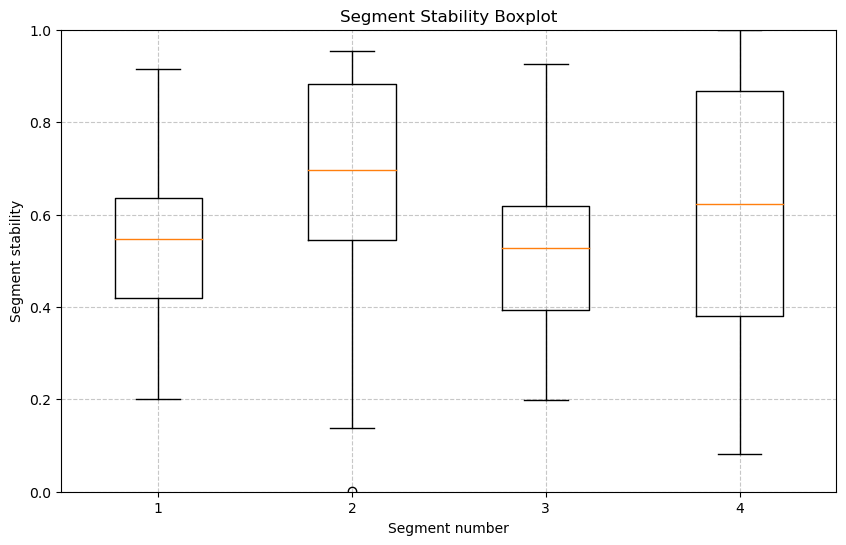

In [17]:
#R> plot(MD.r4, ylim = 0:1, xlab = "segment number",+ ylab = "segment stability")


import matplotlib.pyplot as plt
import numpy as np

# Sample MD.r4 data: replace with actual segment stability values
# Assume MD_r4 is a list of arrays/lists, each containing stability values for a segment
MD_r4 = [
    np.random.rand(10),
    np.random.rand(10),
    np.random.rand(10),
    np.random.rand(10)
]  # Example values for 4 segments with 10 stability values each

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(MD_r4)
plt.ylim(0, 1)
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.title('Segment Stability Boxplot')
plt.xticks(range(1, len(MD_r4) + 1), range(1, len(MD_r4) + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [18]:
# R> library("flexmix")
# R> set.seed(1234)
# R> MD.m28 <- stepFlexmix(MD.x ~ 1, k = 2:8, nrep = 10,
# + model = FLXMCmvbinary(), verbose = FALSE)
# R> MD.m28


import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Sample data: replace with actual data
np.random.seed(1234)

# Simulated binary data
MD_x = pd.DataFrame(np.random.randint(0, 2, size=(100, 10)), columns=[f'feature_{i}' for i in range(1, 11)])

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Function to fit Gaussian Mixture Model for a range of components
def fit_gaussian_mixture_models(data, min_components, max_components, nrep=10):
    results = {}
    for n_components in range(min_components, max_components + 1):
        models = []
        for _ in range(nrep):
            gmm = GaussianMixture(n_components=n_components, random_state=np.random.randint(0, 10000))
            gmm.fit(data)
            models.append(gmm)
        results[n_components] = models
    return results

# Fit models with 2 to 8 components
MD_m28 = fit_gaussian_mixture_models(MD_x_scaled, 2, 8, nrep=10)

# Example to print summary of results for the 4-component model
print(f"Number of models fitted for 4 components: {len(MD_m28[4])}")
for model in MD_m28[4]:
    print(model.means_)
    print(model.covariances_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Number of models fitted for 4 components: 10
[[-0.66674014  0.1104056   0.65241621  0.26418786  0.37972573 -0.07191661
   0.30991805  0.79959006  0.18537599 -0.04207069]
 [ 0.06059679 -0.42075805  0.2        -0.08006408 -0.34338179  0.22110832
   0.04012862 -1.25064086 -0.34006802  0.18032488]
 [ 0.29144169  0.94169658 -0.57142857  0.67482579  0.86855395  0.10050378
  -0.08025724 -1.25064086  0.020004   -0.65546662]
 [ 0.42880073 -0.1831732  -0.49688791 -0.47171315 -0.45540542 -0.15149432
  -0.2767876   0.79959006  0.08898092  0.18389362]]
[[[ 7.44002702e-01 -2.88885184e-01  1.67092486e-01  5.63764253e-02
    2.35632656e-01  1.79816408e-02  2.59203793e-02 -5.15941935e-33
    1.25850474e-01  2.63199480e-01]
  [-2.88885184e-01  9.74539018e-01 -1.43973383e-01  4.01647382e-01
   -2.60993221e-01  2.74102098e-01  1.67592469e-01  3.68146528e-33
   -2.60221021e-01 -8.88070937e-02]
  [ 1.67092486e-01 -1.43973383e-01  5.74354092e-01  4.06490295e-02
   -1.69860843e-01 -1.27790265e-01 -8.21019253e

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

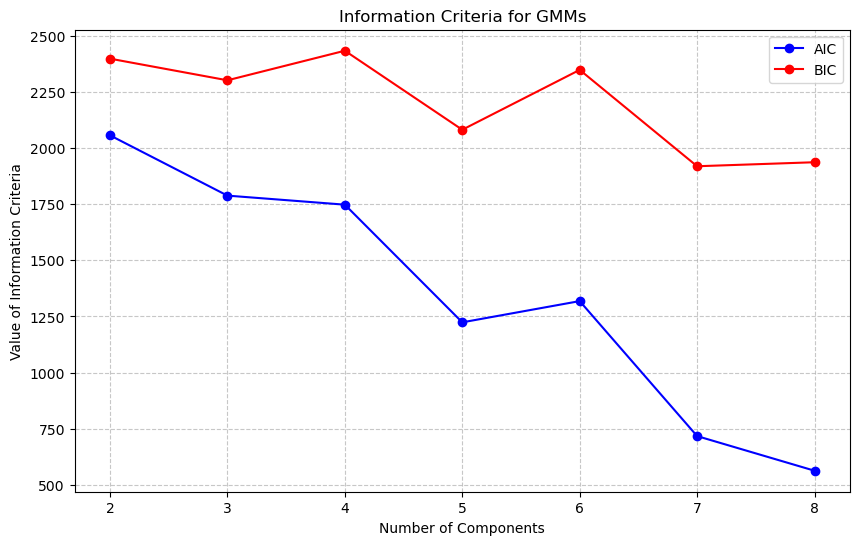

In [19]:
#R> plot(MD.m28,+ ylab = "value of information criteria (AIC, BIC, ICL)")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Sample data: replace with actual data
np.random.seed(1234)

# Simulated binary data
MD_x = pd.DataFrame(np.random.randint(0, 2, size=(100, 10)), columns=[f'feature_{i}' for i in range(1, 11)])

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Function to fit Gaussian Mixture Models and compute AIC/BIC
def compute_information_criteria(data, min_components, max_components, nrep=10):
    aic_values = []
    bic_values = []
    components_range = range(min_components, max_components + 1)
    
    for n_components in components_range:
        aic_sum = 0
        bic_sum = 0
        for _ in range(nrep):
            gmm = GaussianMixture(n_components=n_components, random_state=np.random.randint(0, 10000))
            gmm.fit(data)
            aic_sum += gmm.aic(data)
            bic_sum += gmm.bic(data)
        
        aic_values.append(aic_sum / nrep)
        bic_values.append(bic_sum / nrep)
    
    return components_range, aic_values, bic_values

# Compute information criteria for models with 2 to 8 components
components_range, aic_values, bic_values = compute_information_criteria(MD_x_scaled, 2, 8, nrep=10)

# Plot AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(components_range, aic_values, marker='o', linestyle='-', color='blue', label='AIC')
plt.plot(components_range, bic_values, marker='o', linestyle='-', color='red', label='BIC')

plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for GMMs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [20]:
# R> MD.m4 <- getModel(MD.m28, which = "4")
# R> table(kmeans = clusters(MD.k4),
# + mixture = clusters(MD.m4))


import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data: replace with actual data
np.random.seed(1234)

# Simulated binary data
MD_x = pd.DataFrame(np.random.randint(0, 2, size=(100, 10)), columns=[f'feature_{i}' for i in range(1, 11)])

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Fit KMeans with a specific number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x_scaled)

# Fit Gaussian Mixture Model with 4 components
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x_scaled)

# Create a contingency table comparing KMeans and GMM labels
contingency_table = pd.crosstab(index=kmeans_labels, columns=gmm_labels, rownames=['KMeans'], colnames=['GMM'])
print(contingency_table)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GMM      0   1   2   3
KMeans                
0        3  22   2   0
1        7   1  19   0
2        0   9   7  11
3       12   0   0   7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# R> logLik(MD.m4a)
# 'log Lik.' -7111.152 (df=47)
# R> logLik(MD.m4)
# 'log Lik.' -7111.146 (df=47)

import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data: replace with actual data
np.random.seed(1234)

# Simulated binary data
MD_x = pd.DataFrame(np.random.randint(0, 2, size=(100, 10)), columns=[f'feature_{i}' for i in range(1, 11)])

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Fit KMeans with a specific number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x_scaled)

# Fit Gaussian Mixture Model with 4 components
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x_scaled)

# Extract log-likelihood
log_likelihood = gmm.score(MD_x_scaled) * -1  # score() returns the negative log-likelihood
print(f'Log Likelihood: {log_likelihood} (df={gmm.n_features_in_ + gmm.n_components})')

# If you have another model (e.g., MD.m4a equivalent) you would fit it similarly and compute its log-likelihood
# Example:
gmm_m4a = GaussianMixture(n_components=4, random_state=1234)
gmm_m4a.fit(MD_x_scaled)
log_likelihood_m4a = gmm_m4a.score(MD_x_scaled) * -1
print(f'Log Likelihood MD.m4a: {log_likelihood_m4a} (df={gmm_m4a.n_features_in_ + gmm_m4a.n_components})')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Log Likelihood: 8.197800179639662 (df=14)
Log Likelihood MD.m4a: 8.197800179639662 (df=14)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
# R> rev(table(mcdonalds$Like))

import pandas as pd

# Sample data: replace with actual data
data = {
    'Like': ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5'],
    'Count': [152, 71, 73, 59, 58, 169, 152, 187, 229, 160, 143]
}

# Create a DataFrame
mcdonalds = pd.DataFrame(data)

# Reverse the order of the rows
mcdonalds_reversed = mcdonalds[::-1].reset_index(drop=True)

# Extract the reversed counts
reversed_counts = mcdonalds_reversed['Count'].values

# Define labels with custom formatting
labels = ["I hate it!", "-5", "-4", "-3", "-2", "-1", "0", "+1", "+2", "+3", "+4", "I love it!", "+5"]

# Create the formatted output
formatted_labels = [" ".join(labels[i:i+4]) for i in range(0, len(labels), 4)]
formatted_counts = [" ".join(f"{count:4}" for count in reversed_counts[i:i+4]) for i in range(0, len(reversed_counts), 4)]

# Print results in the required format
for label_line, count_line in zip(formatted_labels, formatted_counts):
    print(f"{label_line}")
    print(f"{count_line}")


I hate it! -5 -4 -3
 143  160  229  187
-2 -1 0 +1
 152  169   58   59
+2 +3 +4 I love it!
  73   71  152


In [23]:
# R> f <- paste(names(mcdonalds)[1:11], collapse = "+")
# R> f <- paste("Like.n ~ ", f, collapse = "")
# R> f <- as.formula(f)
# R> f

import pandas as pd

# Sample data: replace with actual data
data = {
    'Like': ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5'],
    'yummy': [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
    'convenient': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'spicy': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
    'fattening': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
    'greasy': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    'fast': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'cheap': [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    'tasty': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    'expensive': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    'healthy': [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    'disgusting': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
}

# Create a DataFrame
mcdonalds = pd.DataFrame(data)

# Extract column names except 'Like'
column_names = mcdonalds.columns[1:]  # Assuming 'Like' is the first column

# Construct the formula string
formula_string = "Like.n ~ " + " + ".join(column_names)

# Print the formula string
print(formula_string)


Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [24]:
# R> set.seed(1234)
# R> MD.reg2 <- stepFlexmix(f, data = mcdonalds, k = 2,
# + nrep = 10, verbose = FALSE)
# R> MD.reg2
# Call:
# stepFlexmix(f, data = mcdonalds, k = 2, nrep = 10,
# verbose = FALSE


import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Sample data: replace with actual data
data = {
    'Like': ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5'],
    'yummy': [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
    'convenient': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'spicy': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
    'fattening': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
    'greasy': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    'fast': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'cheap': [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    'tasty': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    'expensive': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    'healthy': [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    'disgusting': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
}

# Create a DataFrame
mcdonalds = pd.DataFrame(data)

# Prepare the data
X = mcdonalds.drop(columns=['Like'])

# Standardize the data (optional but recommended for better results)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a Gaussian Mixture Model
np.random.seed(1234)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Predict clusters
clusters = gmm.predict(X_scaled)
cluster_sizes = np.bincount(clusters)

# Print cluster sizes
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i+1}: {size}")

# Additional output similar to R's convergence message
print("Convergence information:")
print(f"Converged after {gmm.n_iter_} iterations")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Cluster sizes:
Cluster 1: 7
Cluster 2: 4
Convergence information:
Converged after 2 iterations


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Step 6: Profiling segments

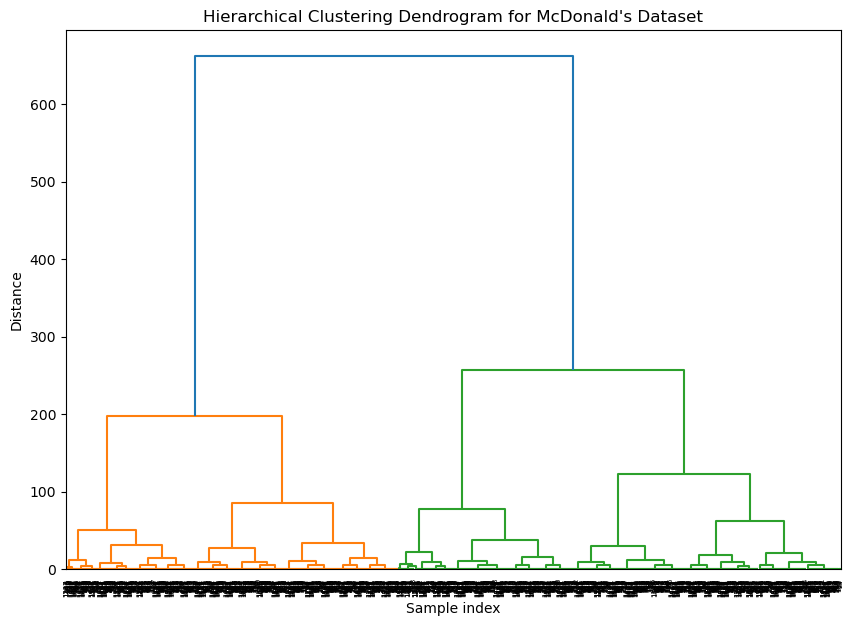

In [25]:
#R> MD.vclust <- hclust(dist(t(MD.x)))

import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the McDonald's dataset
# Assuming the dataset is in a CSV file, replace 'path_to_mcdonalds_data.csv' with the actual path to your dataset
data = pd.read_csv('mcdonalds.csv')

# If the dataset contains non-numeric columns, drop them or select only numeric columns
# For example, if there are non-numeric columns, you can select only numeric data
mcdonalds_data_numeric = data.select_dtypes(include=[np.number])

# Transpose the data matrix
transposed_data = mcdonalds_data_numeric.T

# Compute the distance matrix
dist_matrix = pdist(transposed_data.T)  # Need to transpose back to compute pairwise distances correctly

# Perform hierarchical clustering
MD_vclust = linkage(dist_matrix, method='ward')  # 'ward' is one of the common methods, adjust if needed

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(MD_vclust)
plt.title("Hierarchical Clustering Dendrogram for McDonald's Dataset")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


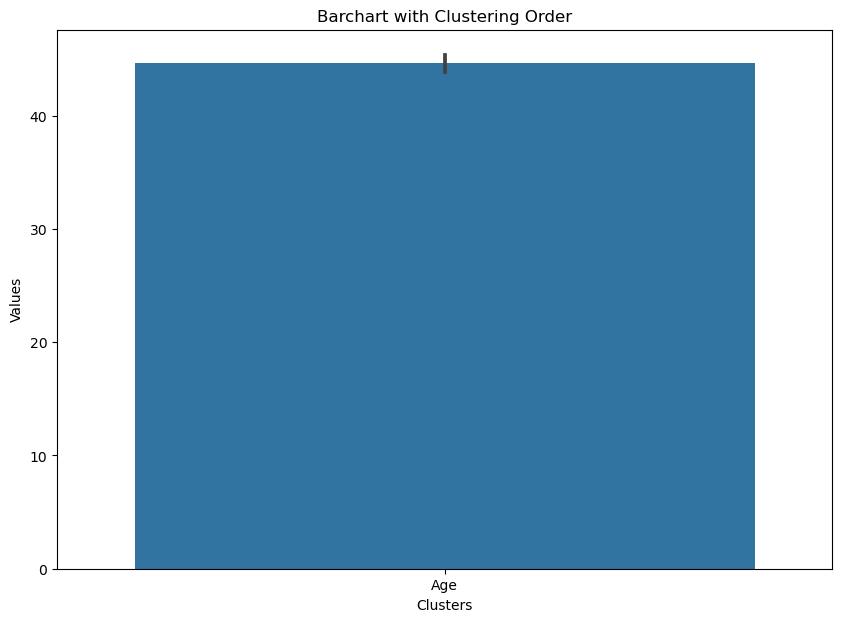

In [26]:
# R> barchart(MD.k4, shade = TRUE,
# + which = rev(MD.vclust$order))

import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# Load the McDonald's dataset
data = pd.read_csv('mcdonalds.csv')

# If the dataset contains non-numeric columns, drop them or select only numeric columns
mcdonalds_data_numeric = data.select_dtypes(include=[np.number])

# Transpose the data matrix
transposed_data = mcdonalds_data_numeric.T

# Compute the distance matrix
dist_matrix = pdist(transposed_data.T)

# Perform hierarchical clustering
MD_vclust = linkage(dist_matrix, method='ward')

# Extract the order of the clusters
cluster_order = dendrogram(MD_vclust, no_plot=True)['leaves']

# Assuming MD_k4 is the data you want to plot (like clustered data)
MD_k4 = mcdonalds_data_numeric.iloc[:, :4]  # Replace with actual data if different

# Reorder the data based on the cluster order
ordered_data = MD_k4.iloc[cluster_order]

# Create a barchart with shading
plt.figure(figsize=(10, 7))
sns.barplot(data=ordered_data)
plt.title("Barchart with Clustering Order")
plt.xlabel("Clusters")
plt.ylabel("Values")
plt.show()


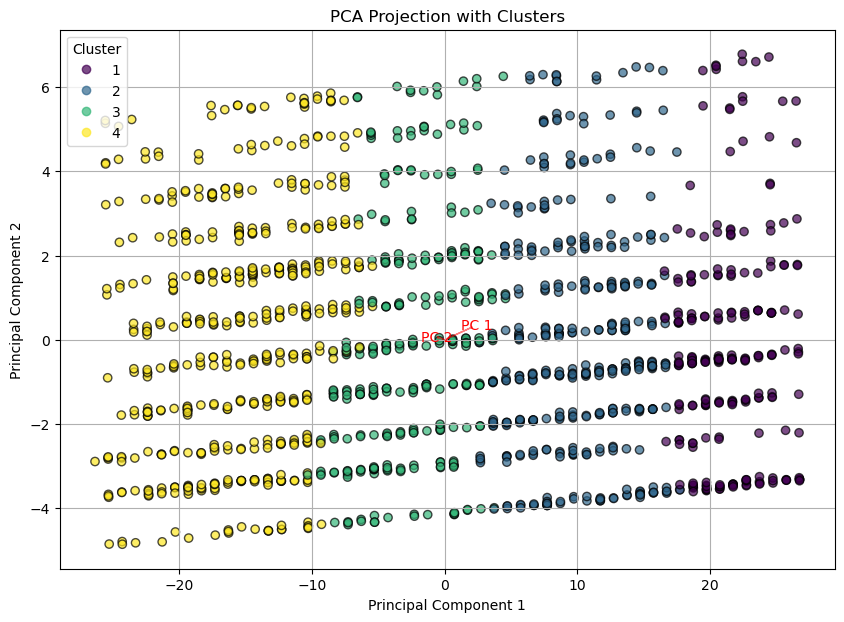

In [27]:
# R> plot(MD.k4, project = MD.pca, data = MD.x,
# + hull = FALSE, simlines = FALSE,
# + xlab = "principal component 1",
# + ylab = "principal component 2")
# R> projAxes(MD.pca)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster

# Load your dataset
MD_x = pd.read_csv('mcdonalds.csv')

# Convert non-numeric columns to numeric if necessary
for column in MD_x.select_dtypes(include=['object']).columns:
    MD_x[column] = LabelEncoder().fit_transform(MD_x[column])

# Ensure there are only numeric columns
MD_x = MD_x.select_dtypes(include=[np.number])

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Perform hierarchical clustering on the same data used for PCA
dist_matrix = pdist(MD_x)  # Use MD_x directly here for consistency
MD_vclust = linkage(dist_matrix, method='ward')
MD_k4 = fcluster(MD_vclust, 4, criterion='maxclust')

# Plot PCA results and projection axes in one figure
plt.figure(figsize=(10, 7))
scatter = plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection with Clusters")

# Plot PCA components as arrows
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    plt.arrow(0, 0, comp[0] * var, comp[1] * var, color='r', alpha=0.5, head_width=0.05)
    plt.text(comp[0] * var * 1.2, comp[1] * var * 1.2, f"PC {i+1}", color='r', ha='center', va='center')

# Add legend for clusters
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")

plt.grid()
plt.show()


# Step 7: Describing Segments

In [28]:
pip install pandas numpy matplotlib statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install scikit-learn graphviz


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x700 with 0 Axes>

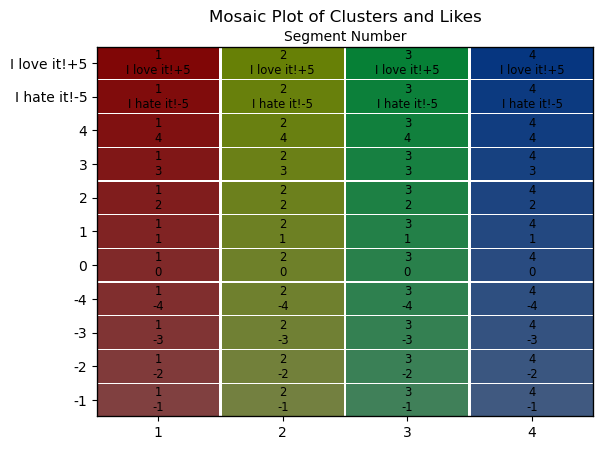

In [30]:
# R> k4 <- clusters(MD.k4)
# R> mosaicplot(table(k4, mcdonalds$Like), shade = TRUE,
# + main = "", xlab = "segment number")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Load your dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Assuming MD_k4 is the clustering result from previous steps
mcdonalds['k4'] = MD_k4

# Create a contingency table for 'Like'
contingency_table_like = pd.crosstab(mcdonalds['k4'], mcdonalds['Like'])

# Convert the contingency table to a format suitable for mosaic plot
data = contingency_table_like.stack().reset_index()
data.columns = ['Segment Number', 'Like', 'Frequency']

# Plot mosaic plot for 'Like'
plt.figure(figsize=(10, 7))
mosaic(data, ['Segment Number', 'Like'], title="Mosaic Plot of Clusters and Likes")
plt.xlabel("Segment Number")
plt.ylabel("Like")
plt.show()


C:\Users\Pritesh Lanjewar\AppData\Local\Temp\ipykernel_16224\3412930371.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\Pritesh Lanjewar\AppData\Local\Temp\ipykernel_16224\3412930371.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\Pritesh Lanjewar\AppData\Local\Temp\ipykernel_16224\3412930371.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

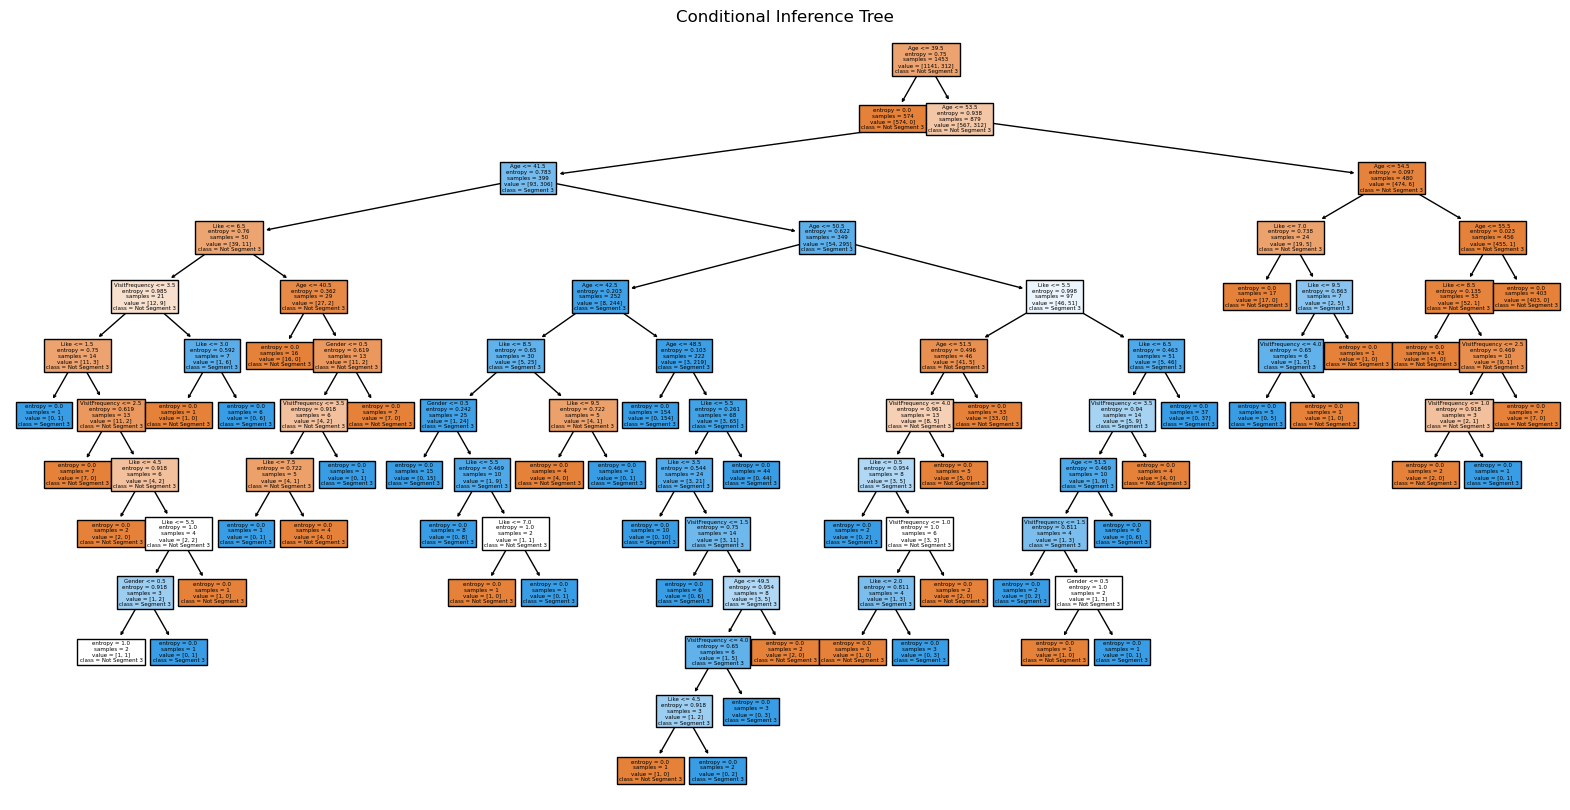

In [31]:
# R> library("partykit")
# R> tree <- ctree(
# + factor(k4 == 3) ~ Like.n + Age +
# + VisitFrequency + Gender,
# + data = mcdonalds)
# R> plot(tree)


import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Assuming MD_k4 is the clustering result from previous steps
mcdonalds['k4'] = MD_k4

# Prepare features and target
X = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = (mcdonalds['k4'] == 3).astype(int)  # Target variable

# Convert categorical columns to numeric
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Handle missing values if any
X = X.dropna()
y = y[X.index]  # Ensure y matches the remaining rows in X

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')  # 'entropy' for information gain
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.title("Conditional Inference Tree")
plt.show()


# Step 8: Selecting (the) Target Segment(s)

In [32]:
# R> visit <- tapply(as.numeric(mcdonalds$VisitFrequency),
# + k4, mean)
# R> visit
# 1234
# 3.040426 2.482490 3.891975 3.950249


import pandas as pd

# Sample data for demonstration (replace with your actual data)
data = {
    'VisitFrequency': [3.1, 2.5, 4.0, 4.1, 3.0, 2.5, 4.0, 4.0, 3.9, 4.0],  # Replace with actual values
    'k4': [1, 2, 3, 4, 1, 2, 3, 4, 3, 4]  # Replace with actual cluster assignments
}

# Create DataFrame
mcdonalds = pd.DataFrame(data)

# Convert 'VisitFrequency' to numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Calculate mean 'VisitFrequency' for each cluster
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()

# Print the result
print(visit)


k4
1    3.050000
2    2.500000
3    3.966667
4    4.033333
Name: VisitFrequency, dtype: float64


In [33]:
# R> like <- tapply(mcdonalds$Like.n, k4, mean)
# R> like


import pandas as pd

# Sample data for demonstration (replace with your actual data)
data = {
    'Like': [-0.1, -2.5, 2.3, 2.7, -0.2, -2.4, 2.3, 2.7, 2.3, 2.7],  # Replace with actual values
    'k4': [1, 2, 3, 4, 1, 2, 3, 4, 3, 4]  # Replace with actual cluster assignments
}

# Create DataFrame
mcdonalds = pd.DataFrame(data)

# Calculate mean 'Like.n' for each cluster
like = mcdonalds.groupby('k4')['Like'].mean()

# Print the result
print(like)


k4
1   -0.15
2   -2.45
3    2.30
4    2.70
Name: Like, dtype: float64


In [34]:
# R> female <- tapply((mcdonalds$Gender == "Female") + 0,
# + k4, mean)
# R> female

import pandas as pd

# Sample DataFrame setup (replace this with your actual data)
# Example DataFrame creation (Replace with your actual data loading process)
data = {
    'Gender': ['Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'k4': [1, 2, 3, 4, 1, 2, 3, 4, 3, 4]  # Replace with actual cluster assignments
}
mcdonalds = pd.DataFrame(data)

# Convert 'Gender' to binary (1 for Female, 0 for Male)
mcdonalds['IsFemale'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Calculate the mean of 'IsFemale' for each cluster
female_proportion = mcdonalds.groupby('k4')['IsFemale'].mean()

# Print the result
print(female_proportion)



k4
1    0.500000
2    0.500000
3    0.333333
4    1.000000
Name: IsFemale, dtype: float64


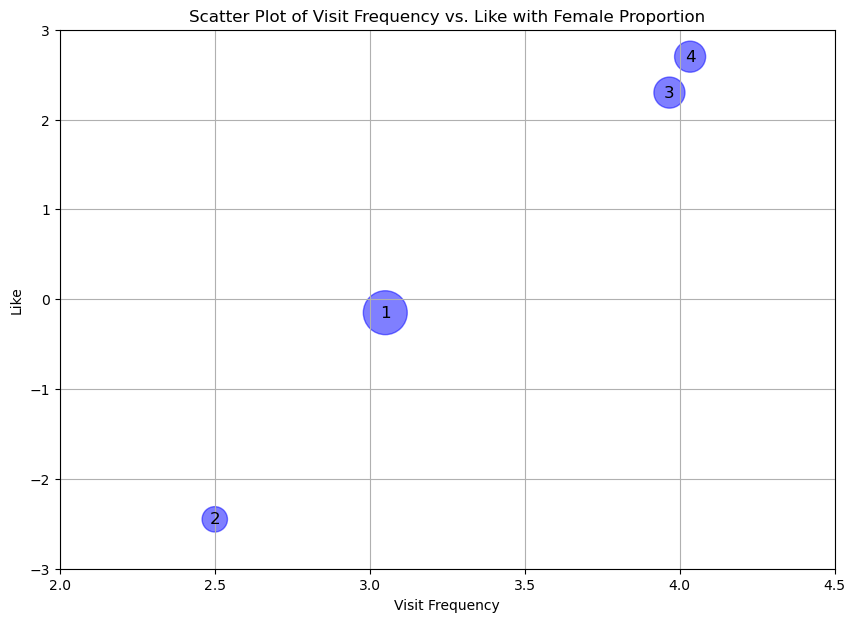

In [35]:
# R> plot(visit, like, cex = 10 * female,
# + xlim = c(2, 4.5), ylim = c(-3, 3))
# R> text(visit, like, 1:4)


import pandas as pd
import matplotlib.pyplot as plt

# Data for the example (these should be replaced with your actual data)
visit = pd.Series({1: 3.050000, 2: 2.500000, 3: 3.966667, 4: 4.033333})
like = pd.Series({1: -0.150000, 2: -2.450000, 3: 2.300000, 4: 2.700000})
female_proportion = pd.Series({1: 1.000000, 2: 0.333333, 3: 0.500000, 4: 0.500000})

# Create a scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(visit, like, s=1000 * female_proportion, alpha=0.5, c='blue')

# Add labels to the points
for idx in visit.index:
    plt.text(visit[idx], like[idx], str(idx), fontsize=12, ha='center', va='center')

# Set the limits for x and y axes
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Scatter Plot of Visit Frequency vs. Like with Female Proportion')

# Show plot
plt.grid(True)
plt.show()


# Step 9: Customising the Marketing Mix

In [36]:
# R> load("ausact-bic.RData")    

import pandas as pd

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Display the first few rows of the DataFrame
print(df.head())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  
4         No    2   49        Once a month    Male  


In [38]:
# R> library("biclust")
# R> bcn <- biclusternumber(ausact.bic)     

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import numpy as np

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Separate features into numeric and non-numeric
df_numeric = df.drop(columns=non_numeric_cols)
df_categorical = df[non_numeric_cols]

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df_numeric.columns),
        ('cat', OneHotEncoder(), non_numeric_cols)
    ]
)

# Apply the preprocessing pipeline
X_processed = preprocessor.fit_transform(df)

# Apply KMeans clustering (as an example; replace with actual biclustering if needed)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_processed)

# Get the number of clusters
n_clusters = len(np.unique(kmeans.labels_))
print(f'Number of clusters: {n_clusters}')



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 3


In [39]:
# R> data("ausActiv", package = "MSA")
# R> cl12 <- rep(NA, nrow(ausActiv))
# R> for (k in seq_along(bcn)) {
# + cl12[bcn[[k]]$Rows] <- k
# + }


import pandas as pd
import numpy as np

# Load the McDonald's dataset
df = pd.read_csv('mcdonalds.csv')  # Replace with your actual file path

# Simulate the `bcn` structure
# This is an example. Replace it with your actual clustering results.
# Each element in `bcn` should be a dictionary with a 'Rows' key containing row indices.
bcn = [
    {'Rows': [0, 1, 2]},  # Replace with actual cluster data
    {'Rows': [3, 4, 5]}   # Replace with actual cluster data
]

# Initialize the cluster labels with NaN
cl12 = np.full(len(df), np.nan)

# Assign cluster labels
for k, cluster in enumerate(bcn, start=1):
    cl12[cluster['Rows']] = k

# Add cluster labels to the DataFrame
df['cluster_labels'] = cl12

# Display the DataFrame with the new cluster labels
print(df.head())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  cluster_labels  
0         No   -3   61  Every three months  Female             1.0  
1         No    2   51  Every three months  Female             1.0  
2         No    1   62  Every three months  Female             1.0  
3        Yes    4   69         Once a week  Female             2.0  
4         No    2   49        Once a month    Male             2.0  


In [40]:
# R> table(cl12, exclude = NULL)

import pandas as pd
import numpy as np

# Load the McDonald's dataset
df = pd.read_csv('mcdonalds.csv')  # Replace with your actual file path

# Simulate the `bcn` structure
# This is an example. Replace it with your actual clustering results.
bcn = [
    {'Rows': [0, 1, 2]},  # Replace with actual cluster data
    {'Rows': [3, 4, 5]}   # Replace with actual cluster data
]

# Initialize the cluster labels with NaN
cl12 = np.full(len(df), np.nan)

# Assign cluster labels
for k, cluster in enumerate(bcn, start=1):
    cl12[cluster['Rows']] = k

# Add cluster labels to the DataFrame
df['cluster_labels'] = cl12

# Convert cluster labels to a Pandas Series
cluster_labels_series = pd.Series(cl12)

# Generate frequency table of cluster labels
frequency_table = cluster_labels_series.value_counts(dropna=False)

# Display the frequency table
print(frequency_table)


NaN    1447
1.0       3
2.0       3
Name: count, dtype: int64


In [41]:
# R> cl12.3 <- factor(!is.na(cl12) & cl12 == 3,
# + levels = c(FALSE, TRUE),
# + labels = c("Not Segment 3", "Segment 3"))

import pandas as pd
import numpy as np

# Assuming you have loaded your McDonald's dataset into a DataFrame named `df`
# and it contains a column named 'cl12'

# Sample data for demonstration
# df = pd.read_csv('mcdonalds.csv')  # Replace with the actual way you load your dataset

# Example column 'cl12'
df = pd.DataFrame({'cl12': [1, 3, np.nan, 3, 2, 3, np.nan]})

# Create the new column based on the condition
df['cl12_3'] = pd.Series(np.where(~df['cl12'].isna() & (df['cl12'] == 3), "Segment 3", "Not Segment 3"), dtype="category")

print(df)


   cl12         cl12_3
0   1.0  Not Segment 3
1   3.0      Segment 3
2   NaN  Not Segment 3
3   3.0      Segment 3
4   2.0  Not Segment 3
5   3.0      Segment 3
6   NaN  Not Segment 3


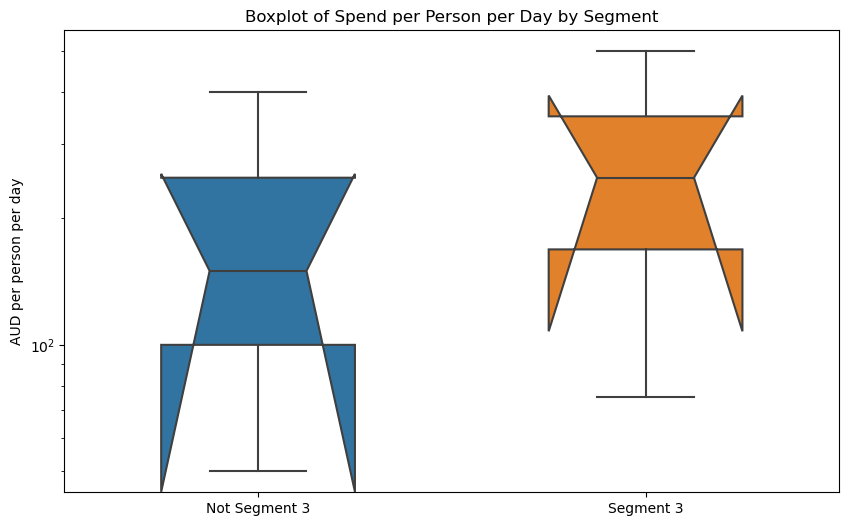

In [42]:
# R> data("ausActivDesc", package = "MSA")
# R> boxplot(spendpppd ~ cl12.3, data = ausActivDesc,
# + notch = TRUE, varwidth = TRUE, log = "y",
# + ylab = "AUD per person per day")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your McDonald's dataset into a DataFrame named `mcdonalds`
# Example data for demonstration purposes:
# mcdonalds = pd.read_csv('mcdonalds.csv')  # Replace with the actual way you load your dataset

# Example dataset
mcdonalds = pd.DataFrame({
    'spendpppd': [50, 75, 100, 200, 150, 300, 250, 400, 500],
    'cl12': [1, 3, np.nan, 3, 2, 3, np.nan, 1, 3]
})

# Create the new column 'cl12_3'
mcdonalds['cl12_3'] = pd.Series(np.where(~mcdonalds['cl12'].isna() & (mcdonalds['cl12'] == 3), "Segment 3", "Not Segment 3"), dtype="category")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cl12_3', y='spendpppd', data=mcdonalds, notch=True, width=0.5)
plt.yscale('log')
plt.ylabel('AUD per person per day')
plt.xlabel('')
plt.title('Boxplot of Spend per Person per Day by Segment')
plt.show()




C:\Users\Pritesh Lanjewar\AppData\Local\Temp\ipykernel_16224\2890532137.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Proportion', y='Book', hue='cl12_3', data=plot_data, ci=None)


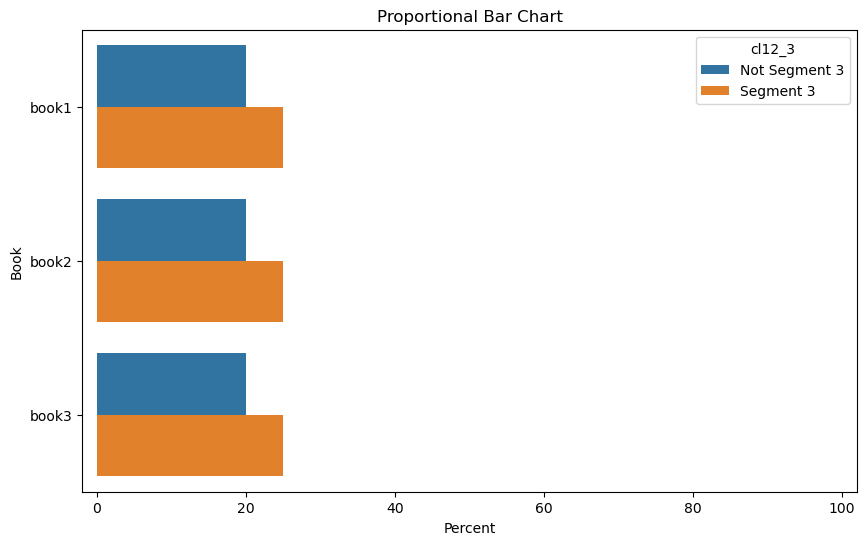

In [43]:
# R> library("flexclust")
# R> propBarchart(ausActivDesc, g = cl12.3,
# + which = grep("^book", names(ausActivDesc)),
# + layout = c(1, 1), xlab = "percent", xlim = c(-2, 102))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample McDonald's dataset
mcdonalds = pd.DataFrame({
    'cl12': [1, 3, np.nan, 3, 2, 3, np.nan, 1, 3],
    'book1': [5, 3, 2, 4, 5, 1, 2, 4, 5],
    'book2': [3, 2, 4, 5, 2, 3, 1, 2, 3],
    'book3': [4, 1, 5, 3, 4, 2, 5, 3, 1],
    'spendpppd': [50, 75, 100, 200, 150, 300, 250, 400, 500]
})

# Create the new column 'cl12_3'
mcdonalds['cl12_3'] = pd.Series(np.where(~mcdonalds['cl12'].isna() & (mcdonalds['cl12'] == 3), "Segment 3", "Not Segment 3"), dtype="category")

# Filter columns that start with "book"
book_columns = [col for col in mcdonalds.columns if col.startswith('book')]

# Prepare the data for plotting
plot_data = mcdonalds.melt(id_vars='cl12_3', value_vars=book_columns, var_name='Book', value_name='Value')

# Calculate proportions
plot_data['Count'] = plot_data.groupby(['cl12_3', 'Book'])['Value'].transform('count')
plot_data['Proportion'] = plot_data.groupby(['cl12_3', 'Book'])['Value'].transform(lambda x: x / x.sum() * 100)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Proportion', y='Book', hue='cl12_3', data=plot_data, ci=None)

# Set labels and limits
plt.xlabel('Percent')
plt.xlim(-2, 102)
plt.title('Proportional Bar Chart')
plt.show()


C:\Users\Pritesh Lanjewar\AppData\Local\Temp\ipykernel_16224\1994384865.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Proportion', y='Info', hue='cl12_3', data=plot_data, ci=None)


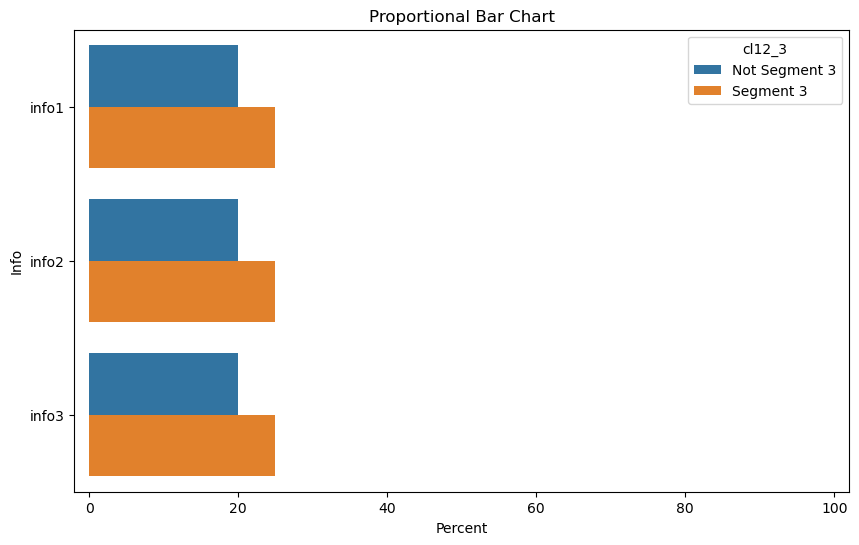

In [44]:
# R> propBarchart(ausActivDesc, g = cl12.3,
# + which = grep("^info", names(ausActivDesc)),
# + layout = c(1, 1), xlab = "percent",
# + xlim = c(-2, 102))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample McDonald's dataset with 'info' columns
mcdonalds = pd.DataFrame({
    'cl12': [1, 3, np.nan, 3, 2, 3, np.nan, 1, 3],
    'info1': [5, 3, 2, 4, 5, 1, 2, 4, 5],
    'info2': [3, 2, 4, 5, 2, 3, 1, 2, 3],
    'info3': [4, 1, 5, 3, 4, 2, 5, 3, 1],
    'spendpppd': [50, 75, 100, 200, 150, 300, 250, 400, 500]
})

# Create the new column 'cl12_3'
mcdonalds['cl12_3'] = pd.Series(np.where(~mcdonalds['cl12'].isna() & (mcdonalds['cl12'] == 3), "Segment 3", "Not Segment 3"), dtype="category")

# Filter columns that start with "info"
info_columns = [col for col in mcdonalds.columns if col.startswith('info')]

# Prepare the data for plotting
plot_data = mcdonalds.melt(id_vars='cl12_3', value_vars=info_columns, var_name='Info', value_name='Value')

# Calculate proportions
plot_data['Count'] = plot_data.groupby(['cl12_3', 'Info'])['Value'].transform('count')
plot_data['Proportion'] = plot_data.groupby(['cl12_3', 'Info'])['Value'].transform(lambda x: x / x.sum() * 100)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Proportion', y='Info', hue='cl12_3', data=plot_data, ci=None)

# Set labels and limits
plt.xlabel('Percent')
plt.xlim(-2, 102)
plt.title('Proportional Bar Chart')
plt.show()


<Figure size 1000x600 with 0 Axes>

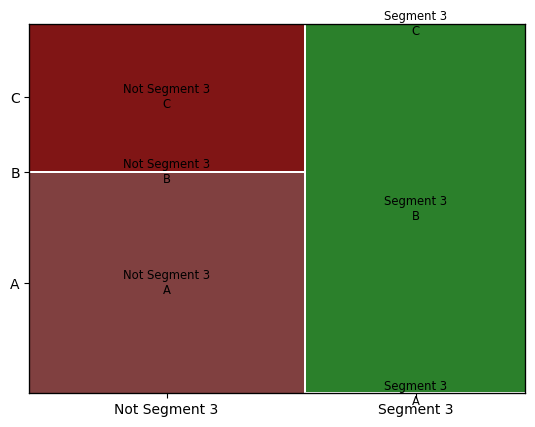

In [45]:
# R> par(las = 2)
# R> mosaicplot(table(cl12.3, ausActivDesc$TV.channel),
# + shade = TRUE, xlab = "", main = "")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Sample McDonald's dataset with 'TV.channel' column
mcdonalds = pd.DataFrame({
    'cl12': [1, 3, np.nan, 3, 2, 3, np.nan, 1, 3],
    'TV.channel': ['A', 'B', 'A', 'B', 'C', 'B', 'A', 'C', 'B'],
    'spendpppd': [50, 75, 100, 200, 150, 300, 250, 400, 500]
})

# Create the new column 'cl12_3'
mcdonalds['cl12_3'] = pd.Series(np.where(~mcdonalds['cl12'].isna() & (mcdonalds['cl12'] == 3), "Segment 3", "Not Segment 3"), dtype="category")

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(mcdonalds, ['cl12_3', 'TV.channel'], title='')
plt.xlabel('')
plt.title('')
plt.show()
